<a href="https://colab.research.google.com/github/TienNguyen0712/student-alcohol-consumption-data-mining/blob/main/notebooks/03_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🎯 EDA Objective (Mục tiêu Khám phá dữ liệu)**


Mục tiêu của việc khám phá dữ liệu này là để tìm hiểu phân bố của các đặc trưng đồng thời cũng là cách để phát hiện các mối quan hệ đặc biệt giữa các đặc trưng với biên mục tiêu **G3** cụ thể như sau:

- Phân bố của biến mục tiêu G3
- Yếu tố thuộc nhóm học tập tới kết quả cuỗi kỳ
- Yếu tố sử dụng cồn đến với kết quả cuối kỳ
- Xã hội / Gia đình
- Mối quan hệ trực quan tới điểm cuối kỳ

Lựa chọn dãy màu sẽ sử dụng trong suốt quá trình Khám phá dữ liệu

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"

In [82]:
student_mat = pd.read_csv('student-mat.csv')
student_por = pd.read_csv('student-por.csv')
student_merge = pd.read_csv('student_merge.csv')

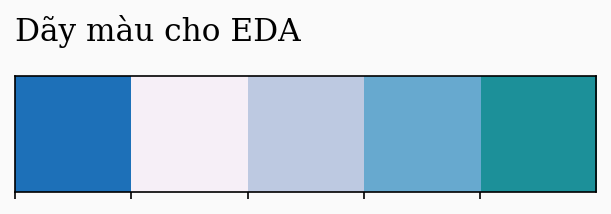

In [83]:
# Palette
sns.palplot(["#1d70b8", "#f6eff7", "#bdc9e1", "#67a9cf","#1c9099"])

plt.title("Dãy màu cho EDA",loc='left',fontsize=15,y=1.2)
plt.show()

## **📈 Target Variable Distribution - G3 (Phân bố biến mục tiêu - G3)**


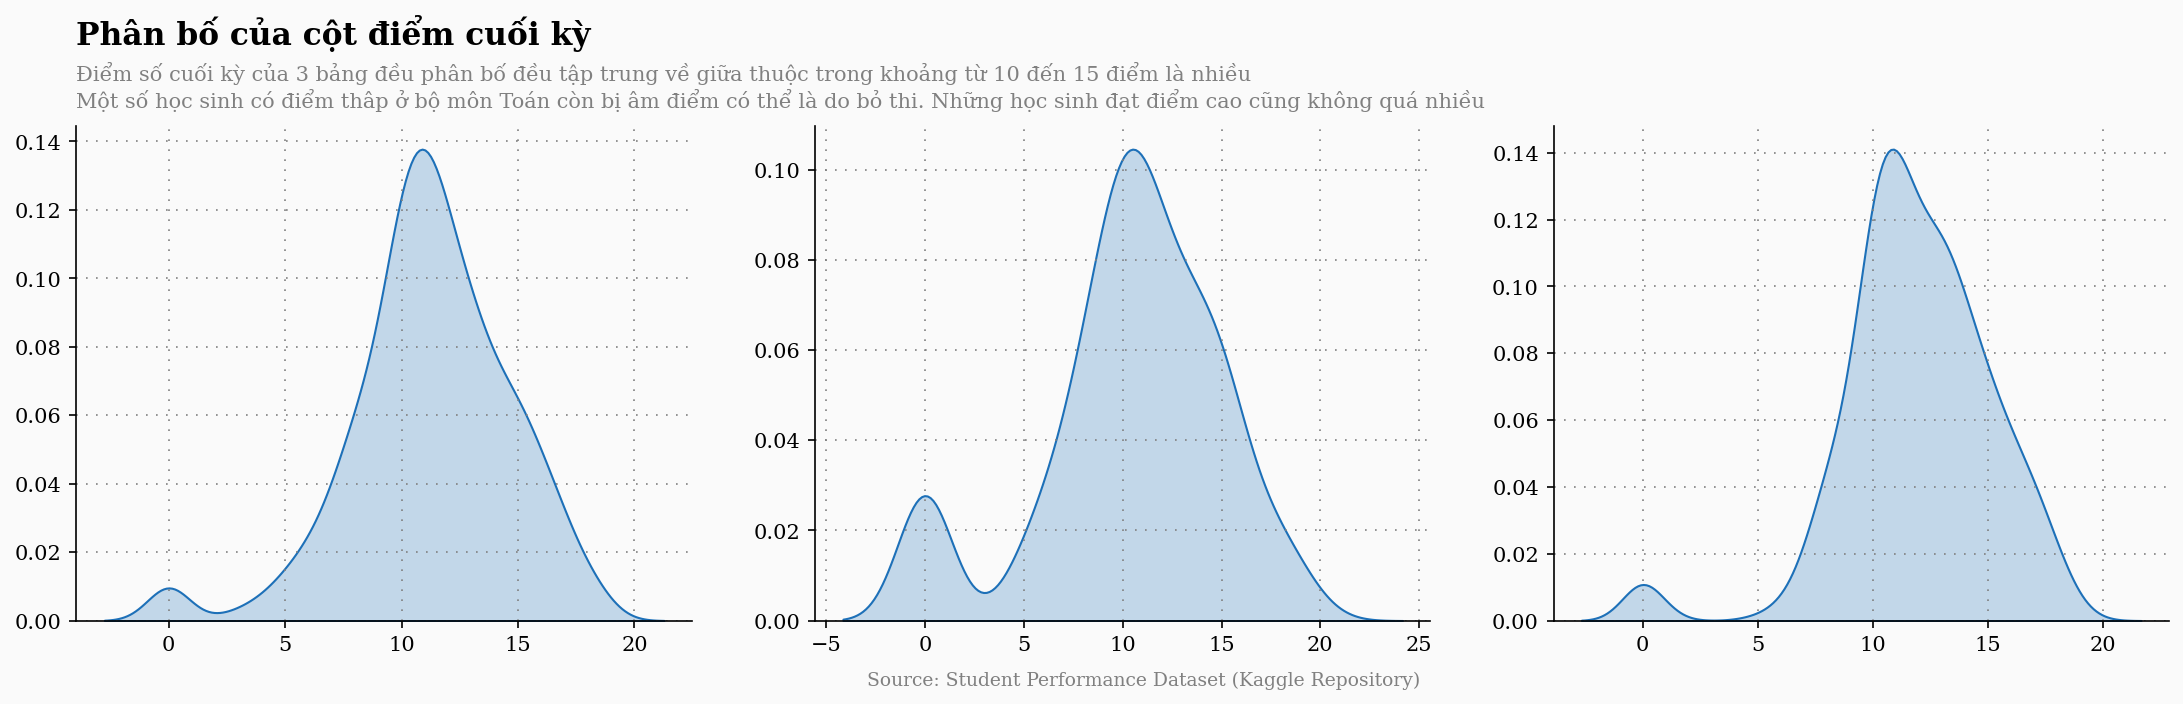

In [113]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)


sns.kdeplot(ax=ax0 ,x= student_merge["G3"], data=student_merge, color="#1d70b8", shade=True)
sns.kdeplot(ax=ax1 ,x= student_mat["G3"], data=student_mat, color="#1d70b8", shade=True)
sns.kdeplot(ax=ax2 ,x= student_por["G3"], data=student_por, color="#1d70b8", shade=True)


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.15), "Phân bố của cột điểm cuối kỳ", fontsize=15, ha="left", va="bottom", weight="bold")
ax0.text(Xstart,Yend+(Yend*0.13), "Điểm số cuối kỳ của 3 bảng đều phân bố đều tập trung về giữa thuộc trong khoảng từ 10 đến 15 điểm là nhiều\nMột số học sinh có điểm thâp ở bộ môn Toán còn bị âm điểm có thể là do bỏ thi. Những học sinh đạt điểm cao cũng không quá nhiều", color="gray", fontsize=10, ha="left", va="top")

ax0.text(30,-0.02, "Source: Student Performance Dataset (Kaggle Repository)", fontsize=9, ha="left", va="bottom", color="gray")


ax0.set_ylabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")


ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

## **🎓 Academic Factors vs G3 (Nhóm học tập với Mục tiêu)**


## **🍺 Alcohol Consumption vs G3 (Nhóm cồn với Mục tiêu)**


## **👨‍👩‍👧‍👦 Social & Family Factors (Nhóm xã hội và Gia đình)**


## **🔍 Correlation Analysis (Phân tích quan hệ)**

## **✅ EDA Summary (Tóm tắt Khám phá dữ liệu)**